In [1]:
# Import libraries to use 
import numpy as np
import matplotlib.pyplot as plt
import math       
import scipy as sp
import scipy.optimize
import subprocess # Library to run ngspice on shell
import seaborn as sns # Library to change the color palette for plots
import random
import timeit # To time computing time
import warnings # To supress warnings
import string
import pandas as pd

import matplotlib
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 
axis_font = {'size':'14'}

In [2]:
def getvidata(filename):
    with open(filename) as f:
            lines = f.readlines()
            data = []
            flag = False
            for line in lines:
                if line[0].startswith('*'):
                    flag = True
                    continue
                #print(line)
                if flag:
                    tmp = [float(x) for x in line.split(',')]
                    data.append(tmp)
    data = np.asanyarray(data)
    return data

<IPython.core.display.Javascript object>


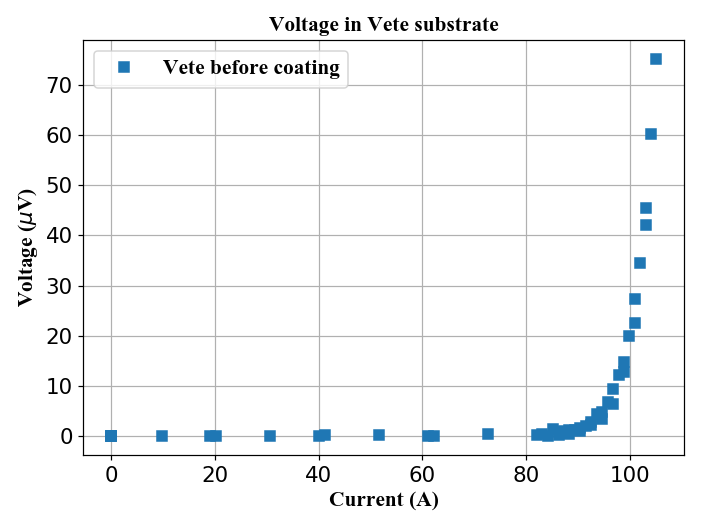

<IPython.core.display.Javascript object>


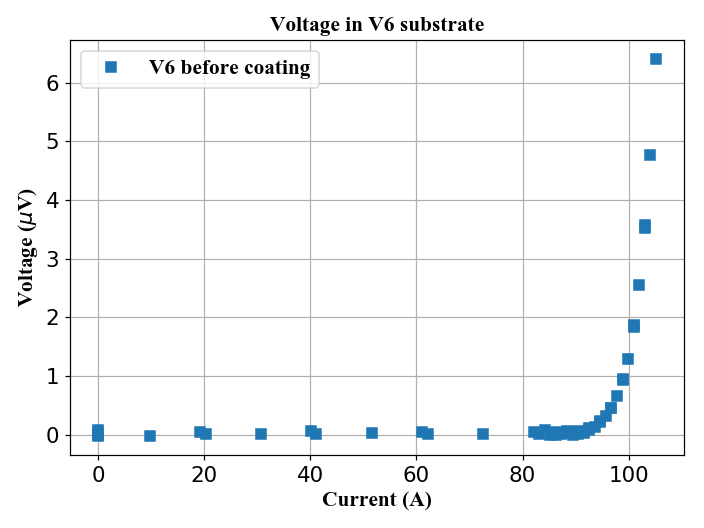

<IPython.core.display.Javascript object>


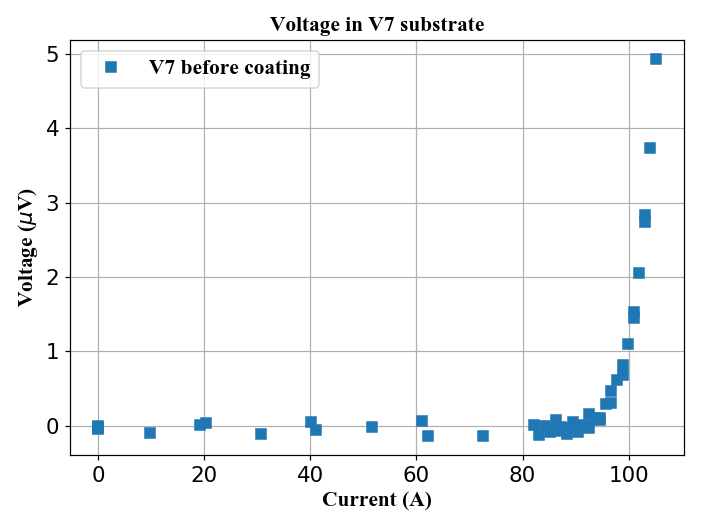

In [3]:
%matplotlib notebook


data_sub_before = getvidata('20011302_t28_substrate_before.VIP')
#data_sub_after = getvidata('19120501_t20_substrate_after.VIP')

Labels = ['I','Vete','V6','V7','time']
for i in range(3):
    index = i+1

    lastpoint = 100

    fig,ax = plt.subplots()
    ax.plot(data_sub_before[:lastpoint,0],(data_sub_before[:lastpoint,index]-data_sub_before[0,index])/1E-6,'s',label = f'{Labels[index]} before coating')
    #ax.plot(data_sub_after[:lastpoint,0],(data_sub_after[:lastpoint,index]-data_sub_after[0,index])/1E-6,'o',label = f'{Labels[index]} after coating')



    ax.set_xlabel('Current (A)',fontname='Times New Roman',**axis_font)
    ax.set_ylabel('Voltage ($\mu$V)',fontname='Times New Roman',**axis_font)
    plt.title(f'Voltage in {Labels[index]} substrate',fontname='Times New Roman',**axis_font)
    #plt.ylim(-1,20)
    ax.grid()
    ax.legend(labelspacing=0.001,ncol=1,loc='best',prop={'family':'Times New Roman', 'size':14}) 
    plt.tight_layout()
    plt.show

#plt.savefig('Ovecurrent_exp.png',dpi=300)

# Aparent Ic

<IPython.core.display.Javascript object>


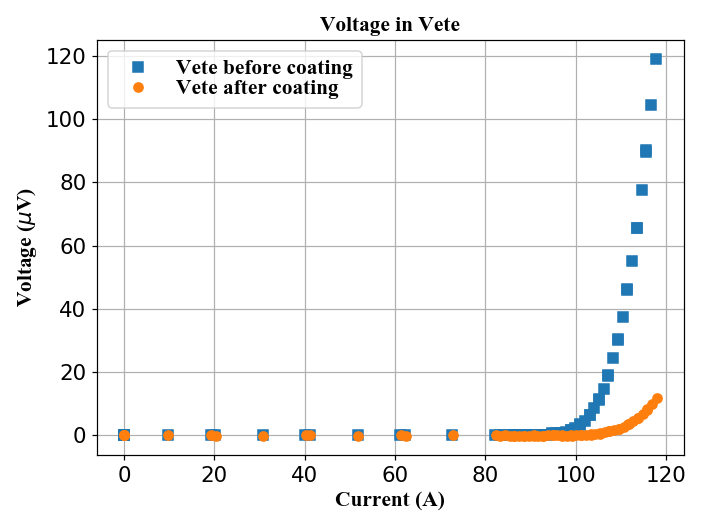

<IPython.core.display.Javascript object>


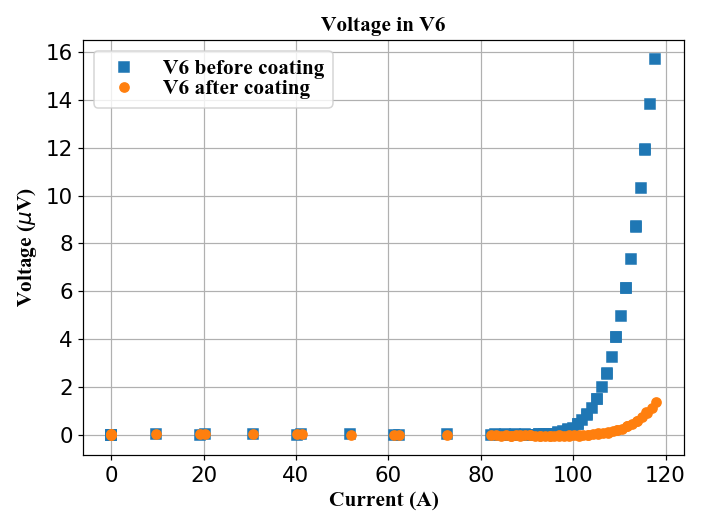

<IPython.core.display.Javascript object>


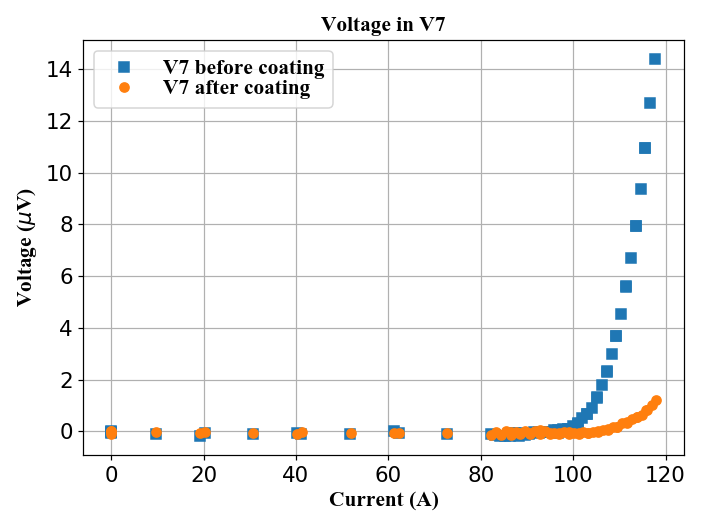

In [4]:
#%matplotlib notebook


data_apar_before = getvidata('20011302_t28_wcu_before.VIP')
data_apar_after = getvidata('20011701_t28_wcu_after.VIP')

Labels = ['I','Vete','V6','V7','time']
for i in range(3):
    index = i+1

    lastpoint = 100

    fig,ax = plt.subplots()
    ax.plot(data_apar_before[:lastpoint,0],(data_apar_before[:lastpoint,index]-data_apar_before[0,index])/1E-6,'s',label = f'{Labels[index]} before coating')
    ax.plot(data_apar_after[:lastpoint,0],(data_apar_after[:lastpoint,index]-data_apar_after[0,index])/1E-6,'o',label = f'{Labels[index]} after coating')



    ax.set_xlabel('Current (A)',fontname='Times New Roman',**axis_font)
    ax.set_ylabel('Voltage ($\mu$V)',fontname='Times New Roman',**axis_font)
    plt.title(f'Voltage in {Labels[index]}',fontname='Times New Roman',**axis_font)
    #plt.ylim(-1,20)
    ax.grid()
    ax.legend(labelspacing=0.001,ncol=1,loc='best',prop={'family':'Times New Roman', 'size':14}) 
    plt.tight_layout()
    plt.show

#plt.savefig('Ovecurrent_exp.png',dpi=300)

<IPython.core.display.Javascript object>


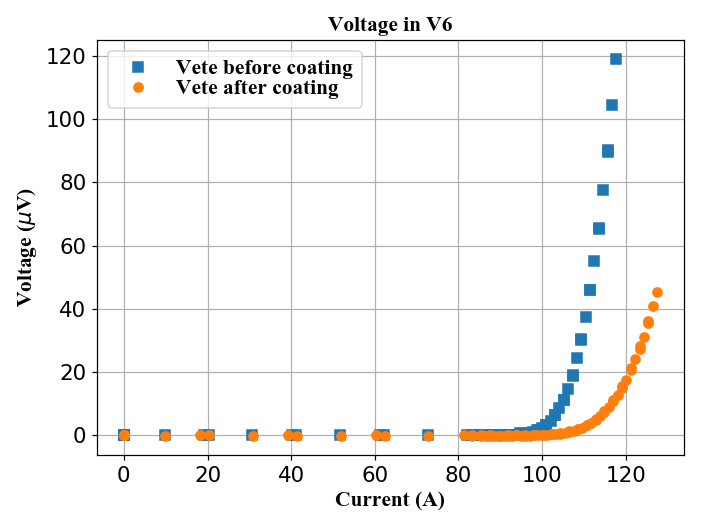

<IPython.core.display.Javascript object>


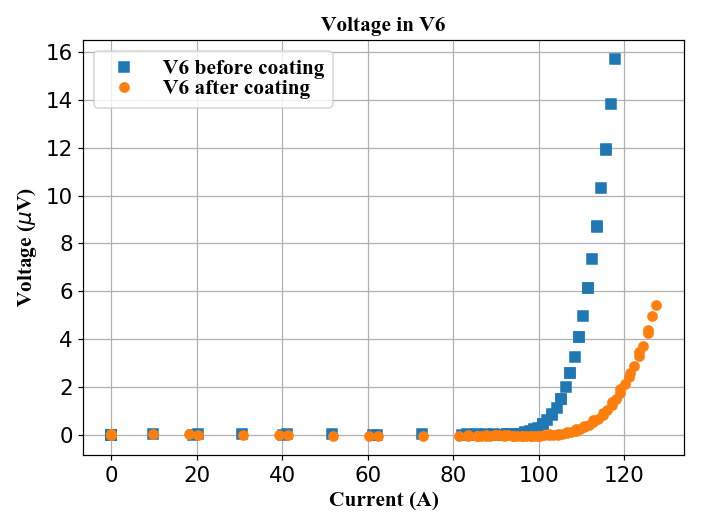

<IPython.core.display.Javascript object>


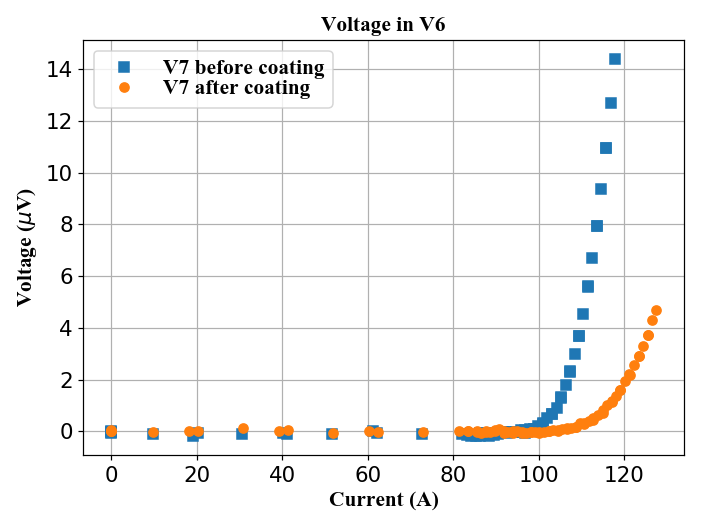

In [5]:
data_apar_before = getvidata('20011302_t28_wcu_before.VIP')
data_apar_after = getvidata('20011704_t28_wcu_after121.VIP')

Labels = ['I','Vete','V6','V7','time']
for i in range(3):
    index = i+1

    lastpoint = 100

    fig,ax = plt.subplots()
    ax.plot(data_apar_before[:lastpoint,0],(data_apar_before[:lastpoint,index]-data_apar_before[0,index])/1E-6,'s',label = f'{Labels[index]} before coating')
    ax.plot(data_apar_after[:lastpoint,0],(data_apar_after[:lastpoint,index]-data_apar_after[0,index])/1E-6,'o',label = f'{Labels[index]} after coating')



    ax.set_xlabel('Current (A)',fontname='Times New Roman',**axis_font)
    ax.set_ylabel('Voltage ($\mu$V)',fontname='Times New Roman',**axis_font)
    plt.title('Voltage in V6',fontname='Times New Roman',**axis_font)
    #plt.ylim(-1,20)
    ax.grid()
    ax.legend(labelspacing=0.001,ncol=1,loc='best',prop={'family':'Times New Roman', 'size':14}) 
    plt.tight_layout()
    plt.show

#plt.savefig('Ovecurrent_exp.png',dpi=300)


# Heater test before and after the coating 85%

<IPython.core.display.Javascript object>


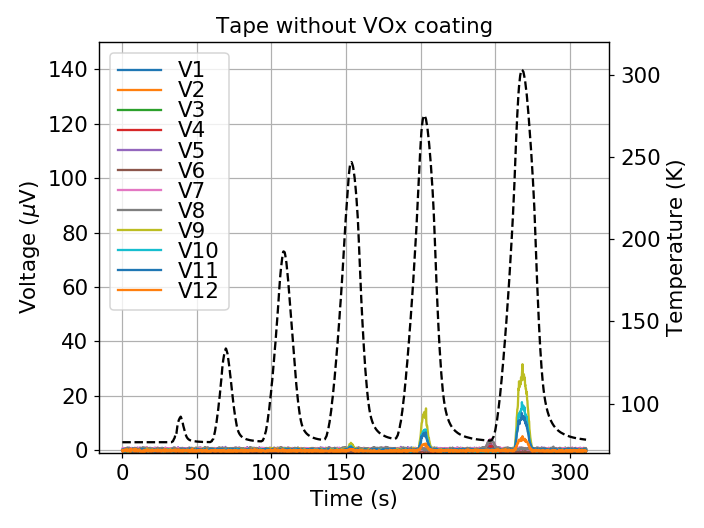

<IPython.core.display.Javascript object>


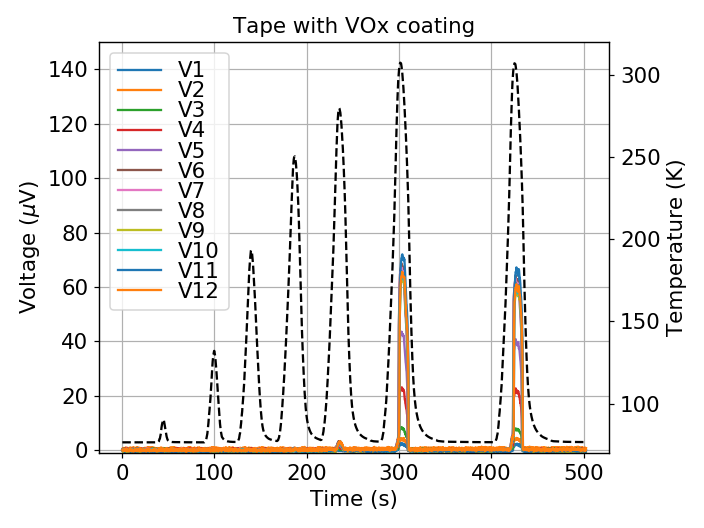

In [9]:
#data_ic_wo = pd.read_csv('tape28_w_cu_2020-01-13-11-53-34.csv')

data_ic_wo = pd.read_csv('tape28_w_cu_2020-01-13-12-09-18.csv')
time_ic_wo = data_ic_wo['time']

fig,ax = plt.subplots()
for i in range(12):
    v_wo = np.asarray(data_ic_wo[f'v{i+1}_m'])
    #v_wo = np.asarray(data_cdaq_wo[f'v{i+1}_m'])

    #ax.plot(time_cdaq_wo[init1_cdaq:]-time_cdaq_wo[init1_cdaq],(v_wo[init1_cdaq:]-v_wo[0])/1e-6,'-',label = f'V{i+4}')
    ax.plot(time_ic_wo,(v_wo-v_wo[0])/1e-6,label = f'V{i+1}')
    #plt.plot(time_cdaq_w[init2_cdaq:]-time_cdaq_w[init2_cdaq],(v_w[init2_cdaq:]-v_w[0])/1e-6,'-', label = 'With VO$_x$ film (exp)')

ax.set_xlabel('Time (s)',**axis_font)
ax.set_ylabel('Voltage ($\mu$V)',**axis_font)
ax.set_ylim(-1,150)
ax.legend(labelspacing=0.001,ncol=1,loc='upper left',prop={'size':14}) 
ax.grid()

ax2 = ax.twinx()
ax2.plot(time_ic_wo,data_ic_wo['T2_m'],'--k')
ax2.set_ylabel('Temperature (K)',**axis_font)
ax2.set_ylim(70,320)
plt.title('Tape without VOx coating',**axis_font)
plt.tight_layout()
plt.savefig('heater22_wo.png')
plt.show()

data_ic_w = pd.read_csv('tape28_w_cu_coating_2020-01-17-14-31-29.csv')
time_ic_w = data_ic_w['time']

fig,ax = plt.subplots()
for i in range(12):
    v_w = np.asarray(data_ic_w[f'v{i+1}_m'])
    #v_wo = np.asarray(data_cdaq_wo[f'v{i+1}_m'])

    #ax.plot(time_cdaq_wo[init1_cdaq:]-time_cdaq_wo[init1_cdaq],(v_wo[init1_cdaq:]-v_wo[0])/1e-6,'-',label = f'V{i+4}')
    ax.plot(time_ic_w,(v_w-v_w[0])/1e-6,label = f'V{i+1}')
    #plt.plot(time_cdaq_w[init2_cdaq:]-time_cdaq_w[init2_cdaq],(v_w[init2_cdaq:]-v_w[0])/1e-6,'-', label = 'With VO$_x$ film (exp)')

ax.set_xlabel('Time (s)',**axis_font)
ax.set_ylabel('Voltage ($\mu$V)',**axis_font)
ax.set_ylim(-1,150)
ax.legend(labelspacing=0.001,ncol=1,loc='upper left',prop={'size':14}) 
ax.grid()

ax2 = ax.twinx()
ax2.plot(time_ic_w,data_ic_w['T2_m'],'--k')
ax2.set_ylabel('Temperature (K)',**axis_font)
ax2.set_ylim(70,320)
plt.title('Tape with VOx coating',**axis_font)
plt.tight_layout()
plt.savefig('heater22_w.png')
plt.show()

# Heater test before and after the coating 90%

<IPython.core.display.Javascript object>


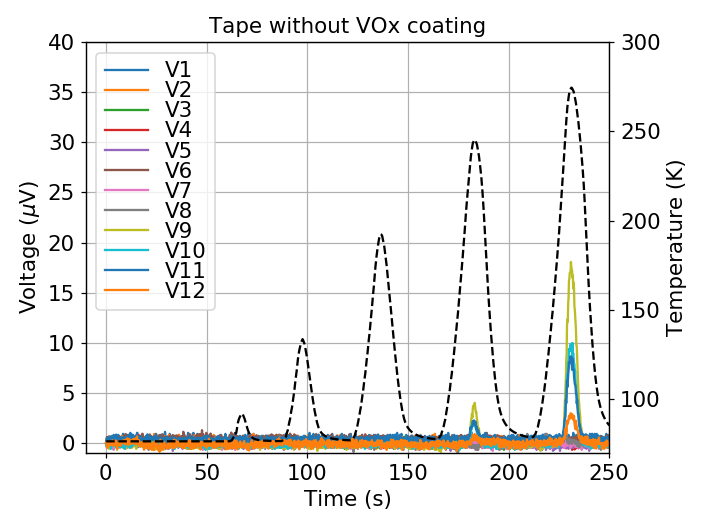

<IPython.core.display.Javascript object>


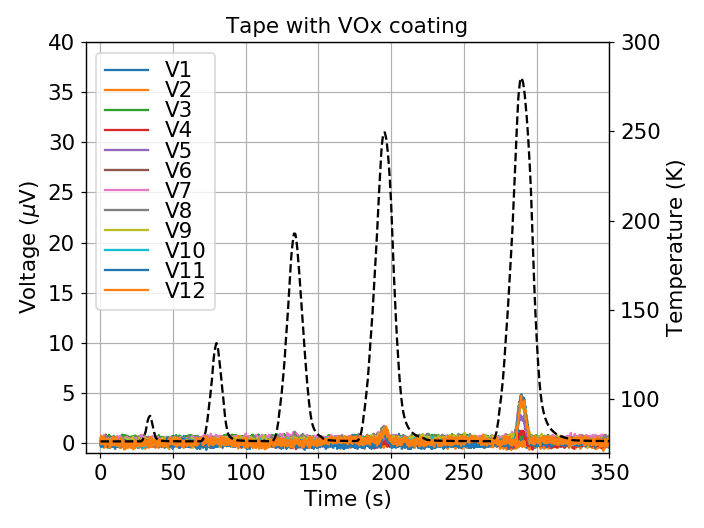

In [13]:

data_ic_wo = pd.read_csv('tape28_w_cu_2020-01-13-12-24-16.csv')
time_ic_wo = data_ic_wo['time']

fig,ax = plt.subplots()
for i in range(12):
    v_wo = np.asarray(data_ic_wo[f'v{i+1}_m'])
    #v_wo = np.asarray(data_cdaq_wo[f'v{i+1}_m'])

    #ax.plot(time_cdaq_wo[init1_cdaq:]-time_cdaq_wo[init1_cdaq],(v_wo[init1_cdaq:]-v_wo[0])/1e-6,'-',label = f'V{i+4}')
    ax.plot(time_ic_wo,(v_wo-v_wo[0])/1e-6,label = f'V{i+1}')
    #plt.plot(time_cdaq_w[init2_cdaq:]-time_cdaq_w[init2_cdaq],(v_w[init2_cdaq:]-v_w[0])/1e-6,'-', label = 'With VO$_x$ film (exp)')

ax.set_xlabel('Time (s)',**axis_font)
ax.set_ylabel('Voltage ($\mu$V)',**axis_font)
ax.set_xlim(-10,250)
ax.set_ylim(-1,40)
ax.legend(labelspacing=0.001,ncol=1,loc='upper left',prop={'size':14}) 
ax.grid()

ax2 = ax.twinx()
ax2.plot(time_ic_wo,data_ic_wo['T2_m'],'--k')
ax2.set_ylabel('Temperature (K)',**axis_font)
ax2.set_ylim(70,300)
plt.title('Tape without VOx coating',**axis_font)
plt.tight_layout()
plt.savefig('heater22_wo.png')
plt.show()

data_ic_w = pd.read_csv('tape28_w_cu_coating_2020-01-17-15-10-16.csv')
time_ic_w = data_ic_w['time']

fig,ax = plt.subplots()
for i in range(12):
    v_w = np.asarray(data_ic_w[f'v{i+1}_m'])
    #v_wo = np.asarray(data_cdaq_wo[f'v{i+1}_m'])

    #ax.plot(time_cdaq_wo[init1_cdaq:]-time_cdaq_wo[init1_cdaq],(v_wo[init1_cdaq:]-v_wo[0])/1e-6,'-',label = f'V{i+4}')
    ax.plot(time_ic_w,(v_w-v_w[0])/1e-6,label = f'V{i+1}')
    #plt.plot(time_cdaq_w[init2_cdaq:]-time_cdaq_w[init2_cdaq],(v_w[init2_cdaq:]-v_w[0])/1e-6,'-', label = 'With VO$_x$ film (exp)')

ax.set_xlabel('Time (s)',**axis_font)
ax.set_ylabel('Voltage ($\mu$V)',**axis_font)
ax.set_xlim(-10,350)
ax.set_ylim(-1,40)
ax.legend(labelspacing=0.001,ncol=1,loc='upper left',prop={'size':14}) 
ax.grid()

ax2 = ax.twinx()
ax2.plot(time_ic_w,data_ic_w['T2_m'],'--k')
ax2.set_ylabel('Temperature (K)',**axis_font)
ax2.set_ylim(70,300)
plt.title('Tape with VOx coating',**axis_font)
plt.tight_layout()
plt.savefig('heater22_w.png')
plt.show()

<IPython.core.display.Javascript object>


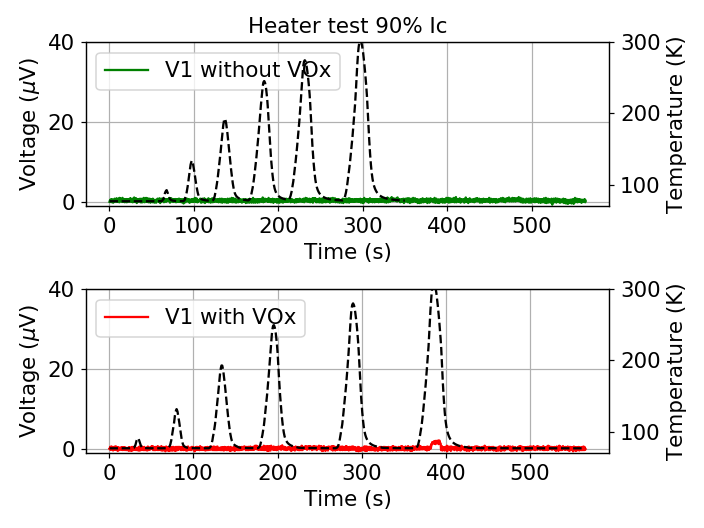

<IPython.core.display.Javascript object>


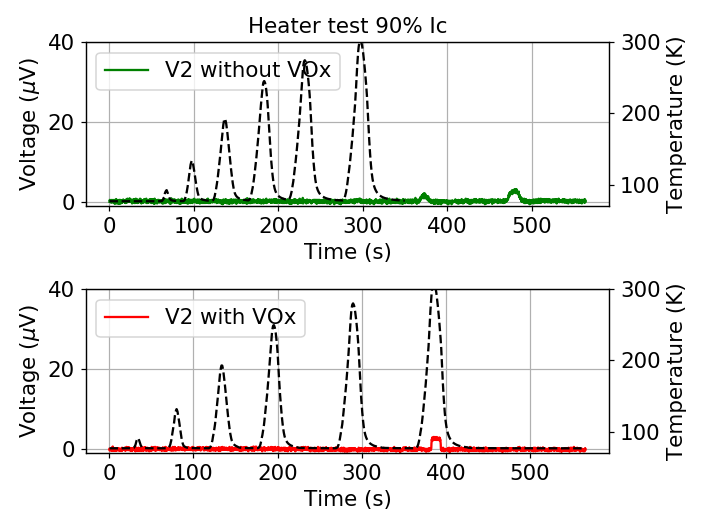

<IPython.core.display.Javascript object>


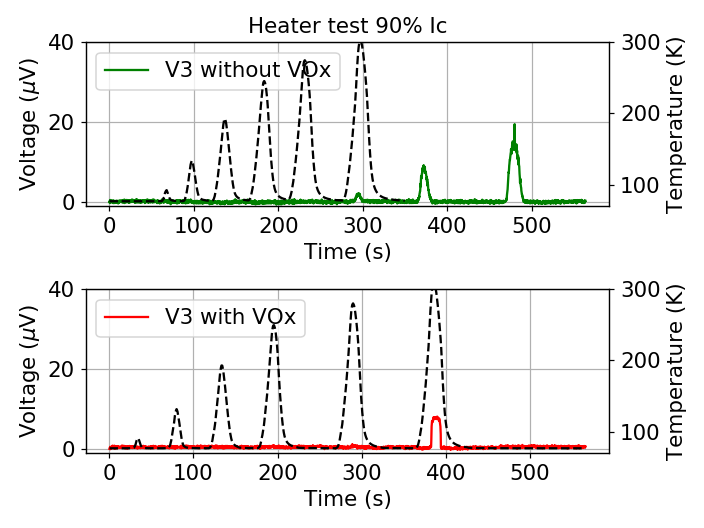

<IPython.core.display.Javascript object>


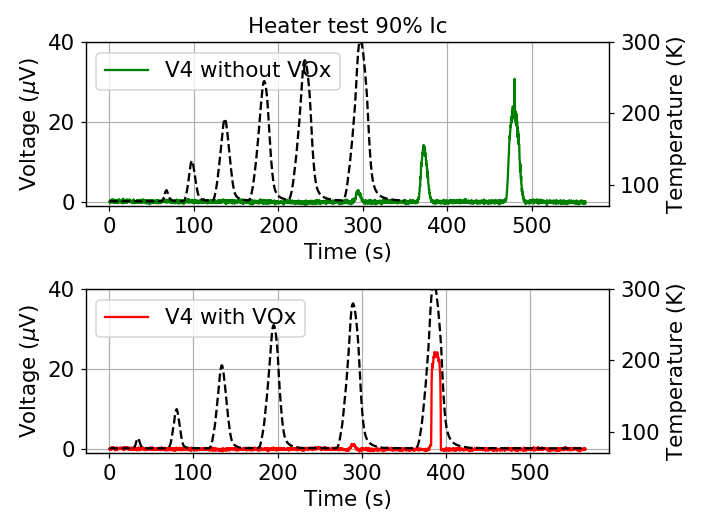

<IPython.core.display.Javascript object>


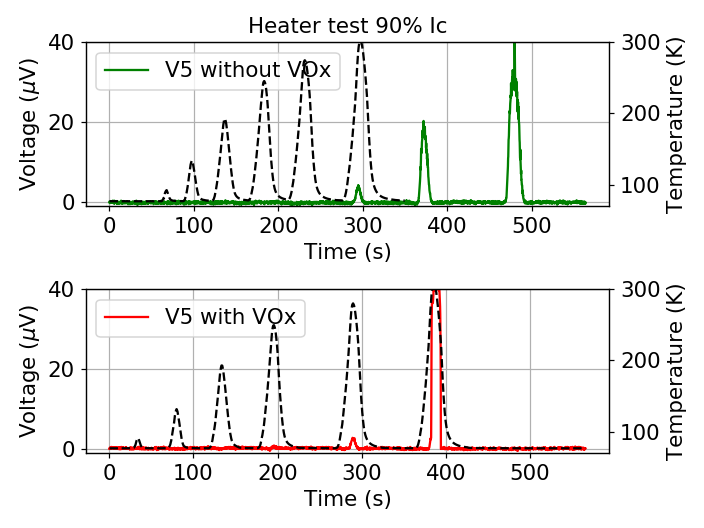

<IPython.core.display.Javascript object>


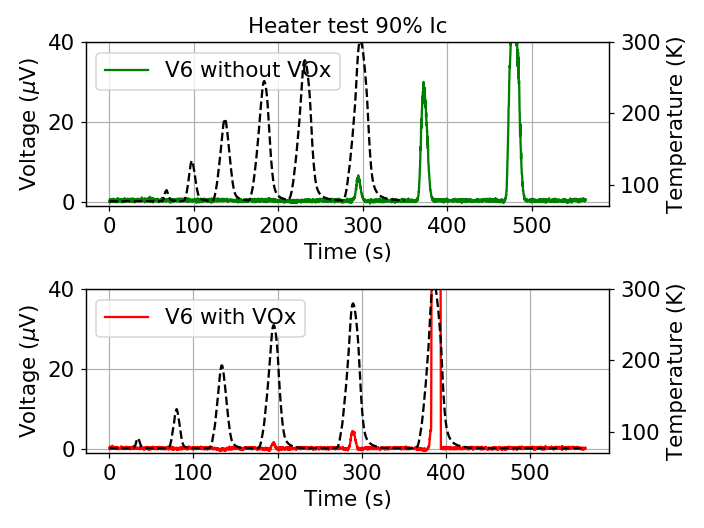

<IPython.core.display.Javascript object>


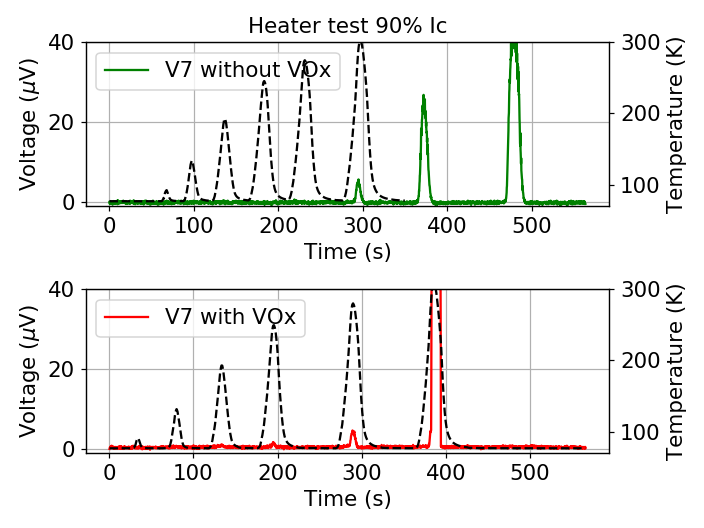

<IPython.core.display.Javascript object>


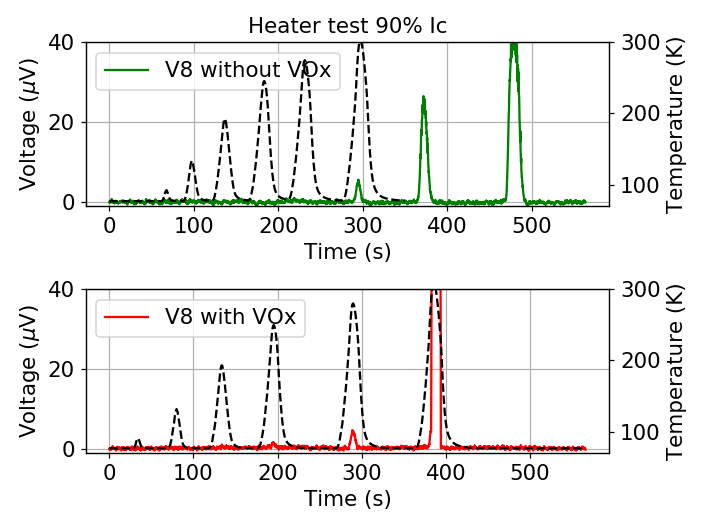

<IPython.core.display.Javascript object>


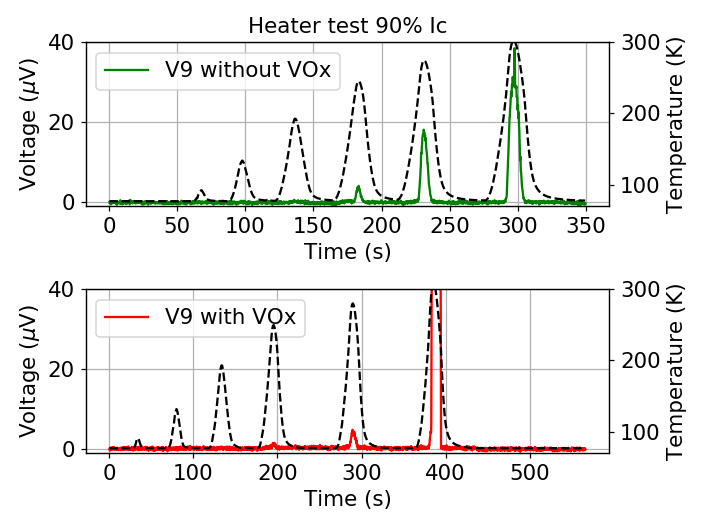

<IPython.core.display.Javascript object>


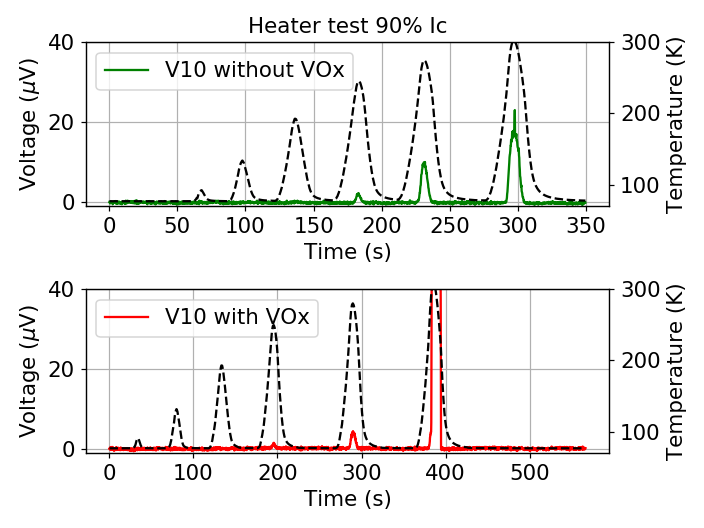

<IPython.core.display.Javascript object>


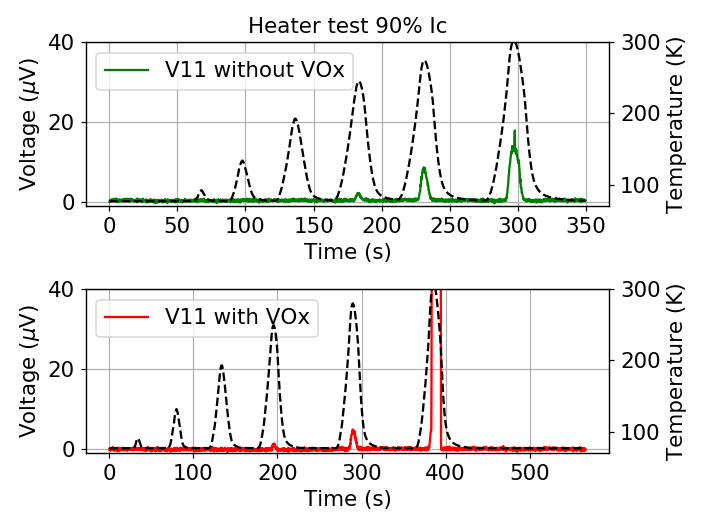

<IPython.core.display.Javascript object>


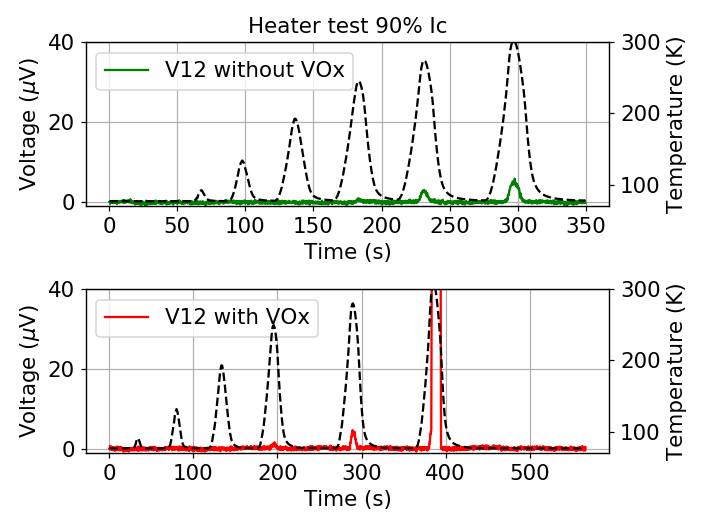

In [15]:

data_ic_wo = pd.read_csv('tape28_w_cu_2020-01-13-12-24-16.csv')
time_ic_wo = data_ic_wo['time']
data_ic_w = pd.read_csv('tape28_w_cu_coating_2020-01-17-15-10-16.csv')
time_ic_w = data_ic_w['time']

for i in range(12):
    v_wo = np.asarray(data_ic_wo[f'v{i+1}_m'])
    v_w = np.asarray(data_ic_w[f'v{i+1}_m'])
    #v_wo = np.asarray(data_cdaq_wo[f'v{i+1}_m'])
    
    fig = plt.figure()
    ax1 = fig.add_subplot(2,1,1)
    ax2 = fig.add_subplot(2,1,2)

    #spacing = 1 # This can be your user specified spacing. 
    #minorLocator = MultipleLocator(spacing)

    ax1.plot(time_ic_wo,(v_wo-v_wo[0])/1e-6,'g',label = f'V{i+1} without VOx')
    ax1.set_xlabel('Time (s)',**axis_font)
    ax1.set_ylabel('Voltage ($\mu$V)',**axis_font)
    ax1.set_ylim(-1,40)

    # Set minor tick locations.
    #ax1.yaxis.set_minor_locator(minorLocator)
    #ax1.xaxis.set_minor_locator(minorLocator)
    # Set grid to use minor tick locations. 
    #ax1.grid(which = 'minor')
    ax1.grid()
    ax1.legend(labelspacing=0.001,ncol=1,loc='upper left',prop={'size':14}) 
    
    ax1b = ax1.twinx()
    ax1b.plot(time_ic_wo,data_ic_wo['T2_m'],'--k')
    ax1b.set_ylabel('Temperature (K)',**axis_font)
    ax1b.set_ylim(70,300)
    plt.title('Heater test 90% Ic',**axis_font)
    plt.tight_layout()

    
    
    ax2.plot(time_ic_w,(v_w-v_w[0])/1e-6,'r',label = f'V{i+1} with VOx')
    #plt.plot(time_cdaq_w[init2_cdaq:]-time_cdaq_w[init2_cdaq],(v_w[init2_cdaq:]-v_w[0])/1e-6,'-', label = 'With VO$_x$ film (exp)')

    ax2.set_xlabel('Time (s)',**axis_font)
    ax2.set_ylabel('Voltage ($\mu$V)',**axis_font)
    ax2.set_ylim(-1,40)
     # Set minor tick locations.
    #ax2.yaxis.set_minor_locator(minorLocator)
    #ax2.xaxis.set_minor_locator(minorLocator)
    # Set grid to use minor tick locations. 
    #ax2.grid(which = 'minor')
    ax2.grid()
    ax2.legend(labelspacing=0.001,ncol=1,loc='upper left',prop={'size':14}) 
    
    ax2b = ax2.twinx()
    ax2b.plot(time_ic_w,data_ic_w['T2_m'],'--k')
    ax2b.set_ylabel('Temperature (K)',**axis_font)
    ax2b.set_ylim(70,300)
    plt.tight_layout()
    plt.show()
